### Import statements

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Read the data

In [35]:
dataframe = pd.read_csv('data.csv')
dataframe.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
print(dataframe.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


### Data Cleaning

In [37]:
print(dataframe['Unnamed: 32'].value_counts())


Series([], Name: Unnamed: 32, dtype: int64)


In [38]:
# drop the empty column from the dataframe
dataframe = dataframe.drop(['id', 'Unnamed: 32'], axis=1)

In [39]:
print(dataframe.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

**As part of data cleaning, check if there are null values in the dataframe.**

In [41]:
#the data length is 569 rows, so if there are null values, we would know from the below command
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

As it can be seen above, there are no null values, all features are numerical in nature.

### Exploratory Data Analysis

For this part of the notebook, we'll try to answer some business questions as well as try to find hidden insights from the data.<br>
In the cell below, we see how the cell types are distributed in the data.

In [42]:
diagnosis_count = dataframe.groupby('diagnosis').size()
print(diagnosis_count)


diagnosis
B    357
M    212
dtype: int64


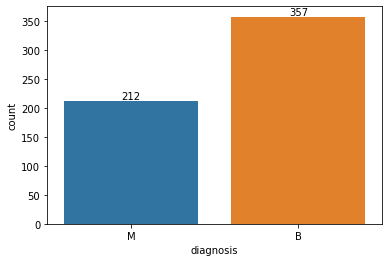

In [43]:
ax = sns.countplot(x=dataframe['diagnosis'])
ax.bar_label(ax.containers[0])
plt.show()

As we can see, although the classes are not equal in number, the dataset is not imbalanced in nature. Malignant class is more than 50% of the Benign class. So addressing class imbalance is *not* required. 

In [44]:
# filtering the "mean" features of the dataframe
data_mean = dataframe.iloc[:, :10]
data_mean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397


### Business Questions

#### Q1. How are specific features for both types of classes different from each other? <br>
    a. Is radius of the cells different for Benign (non-cancerous) and Malignant (cancerous)? 
    b. Is the symmetry of the cells different for Benign and Malignant?

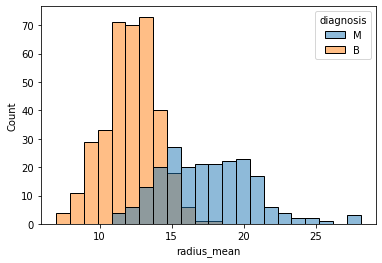

In [45]:
#Plot the histogram of values in radius_mean feature
sns.histplot(data=data_mean, x="radius_mean", hue="diagnosis")
plt.show()

a) According to above plot, the Malignant class has bigger radius on an average. The Benign class has smaller radius. This should provide us intuition that radius_mean feature would be helpful to classify the true nature of the tumor cell.

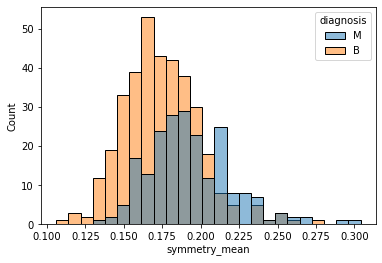

In [46]:
sns.histplot(data=data_mean, x="symmetry_mean", hue="diagnosis")
plt.show()

b) There is a strong overlap between the symmetry of both types of cells, hence the symmetry between the types are similar in nature. According to this result, symmetry_mean might not be an extremely useful feature for classification. 

#### Q2. How are the features distributed in the dataset? 

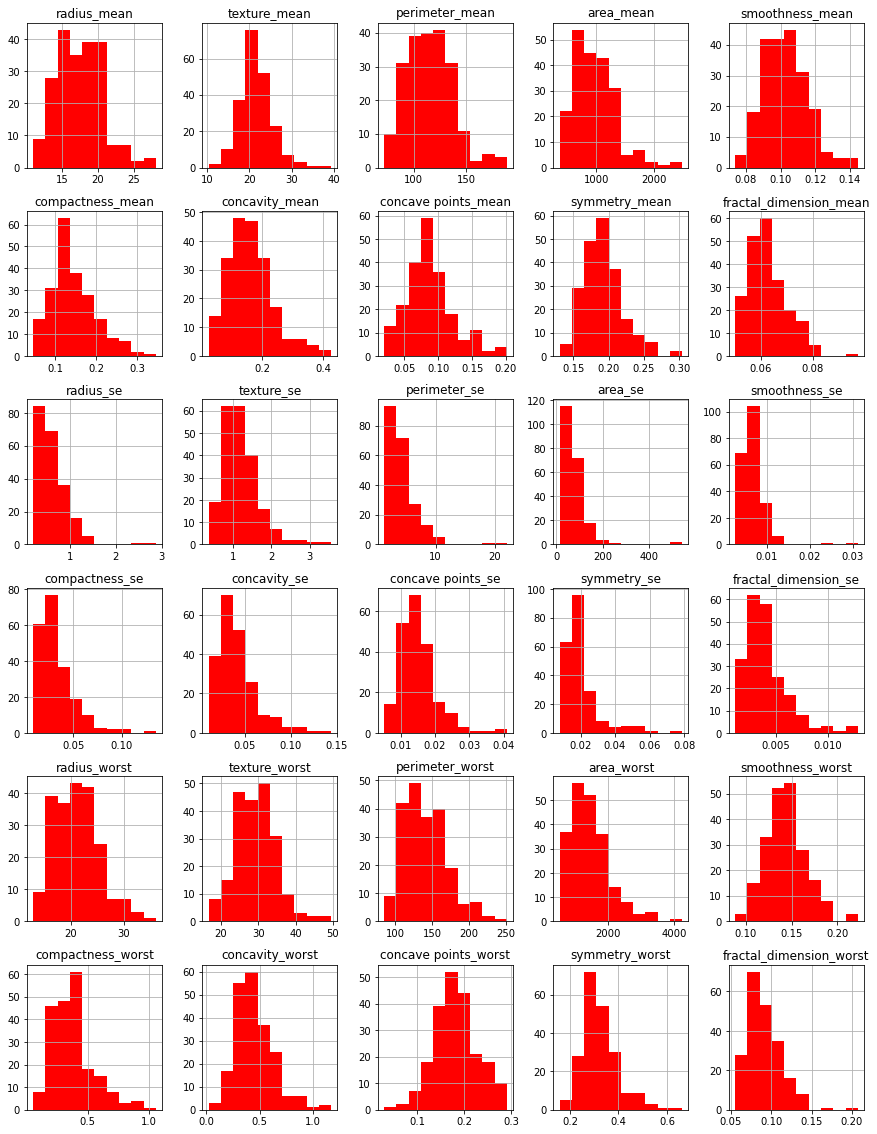

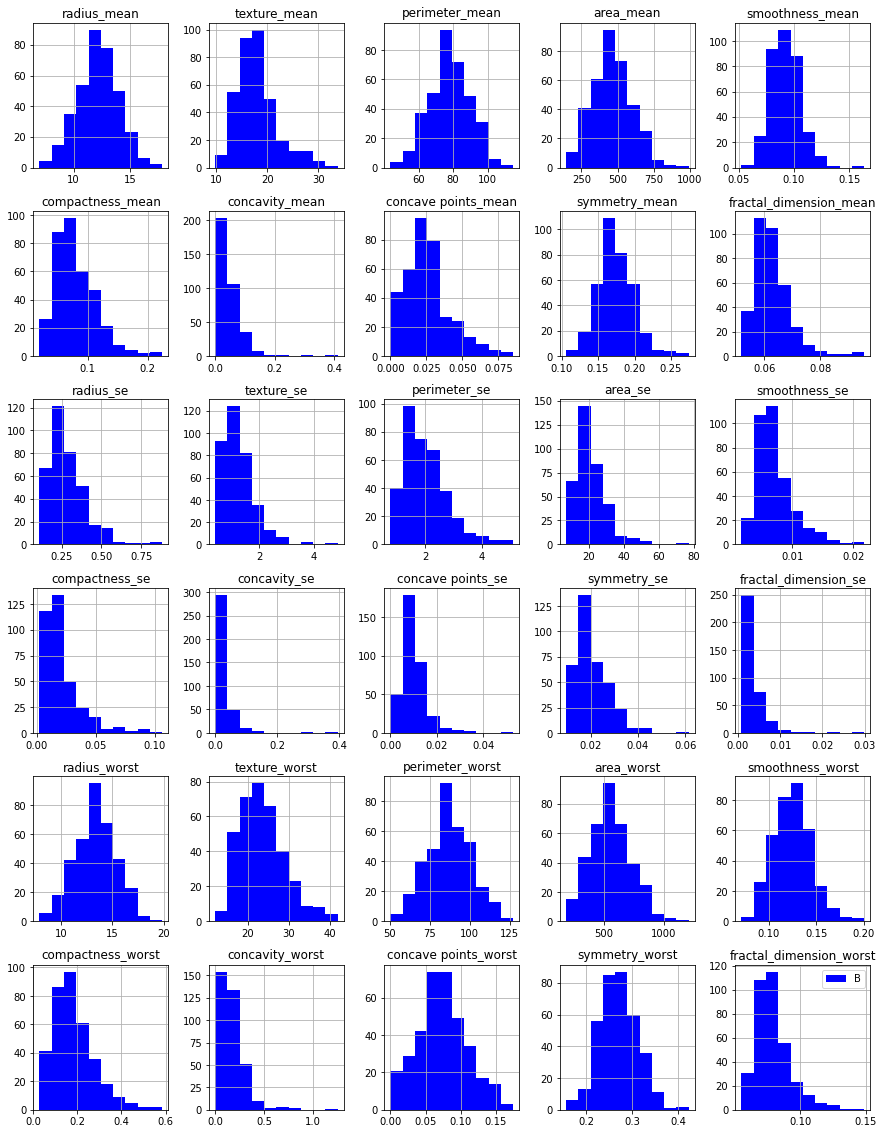

In [47]:
# Filtering the dataset for both types of cells, to see if the dataset is evenly distributed
dataframe[dataframe['diagnosis'] == 'M'].hist(
    color='red', label='M', figsize=(15, 20))
dataframe[dataframe['diagnosis'] == 'B'].hist(
    color='blue', label='B', figsize=(15, 20))
plt.legend(loc='best')


As we can see not all features are not normaly distributed. They are also not present in the same scale. This means, in order to get a well performing model, we would need to bring the features on the same scale. Otherwise our model might perform poorly. 

To address the above challenge of data scale mismatch, we **standardize data**,and bring the data with zero mean and unit standard deviation. Also, when we standardize the data, the process is not affected by outliers.

In [48]:
#Drop the diagnosis column to prepare data for standardization
diagnosis = dataframe[['diagnosis']]
df = dataframe.drop(['diagnosis'], axis=1)

In [49]:
#Perform Standardization
from sklearn import preprocessing
names = df.columns
scaler = preprocessing.RobustScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
# scaled_df


#### Q3. Are there any outliers in the dataset?


So far the dataset has no null values, but since there are numerical features in the dataset, there is a high possibility that there are outliers in the dataset which would have to be addressed before modeling.

We use the boxplots' calculations to identify outliers in the dataset. The calculations are as follows: <br>
default quartiles : IQR = Q3 -Q1, <br>
lower =  1.5 * IQR <br>
lower_whisker = Q1 - 1.5 * IQR, <br>
upper 1.5 * IQR <br>
upper_whisker = Q3 + 1.5 * IQR

To get a general idea about outliers of all 30 features, I am grouping the features in the following subset, as they represent the same real-valued feature for each cell nucleus :<br>
1. Worst subset (represents mean of the three largest values) of cell features <br>
2. Mean subset (represents the mean of values) of cell features <br>
3. Standard error subset (represents the standard error of the values) of cell features <br>

Text(0.5, 1.0, 'Outliers with worst features')

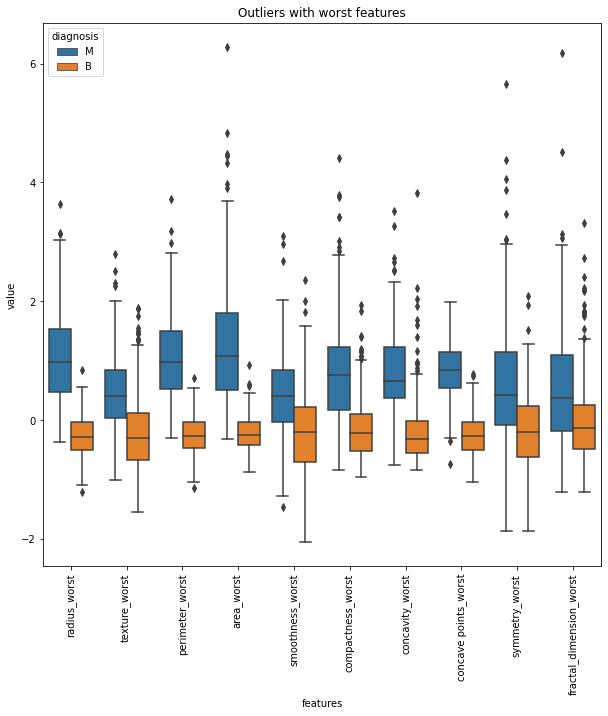

In [50]:
# Plot the boxplot of "worst" subset of features
data_worst = pd.concat([diagnosis, scaled_df.iloc[:, 20:31]], axis=1)
data_worst = pd.melt(data_worst, id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_worst)
plt.xticks(rotation=90)
plt.title("Outliers with worst features")

Text(0.5, 1.0, 'Outliers with mean features')

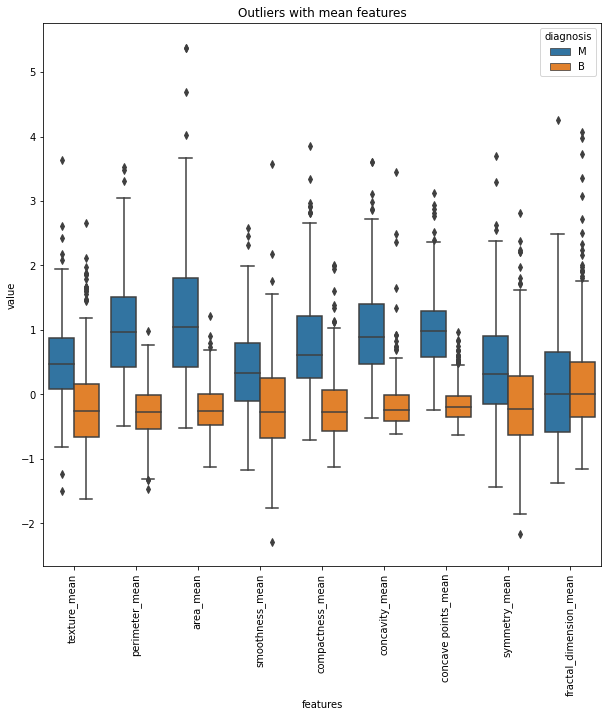

In [51]:
#Plot the boxplot of "mean" subset of features
data_mean = pd.concat([diagnosis, scaled_df.iloc[:, 1:10]], axis=1)
data_mean = pd.melt(data_mean, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_mean)
plt.xticks(rotation=90)
plt.title("Outliers with mean features")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'texture_se'),
  Text(1, 0, 'perimeter_se'),
  Text(2, 0, 'area_se'),
  Text(3, 0, 'smoothness_se'),
  Text(4, 0, 'compactness_se'),
  Text(5, 0, 'concavity_se'),
  Text(6, 0, 'concave points_se'),
  Text(7, 0, 'symmetry_se'),
  Text(8, 0, 'fractal_dimension_se')])

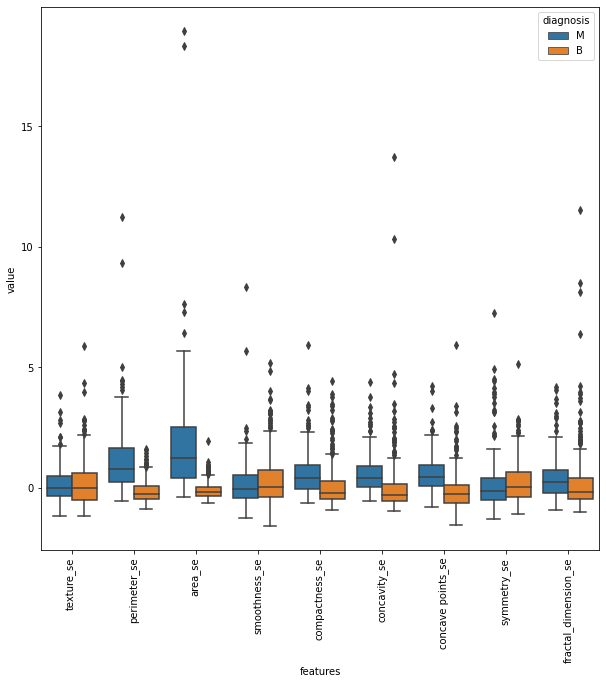

In [52]:
#Plot the boxplot of "standard - error" subset of features
data_se = pd.concat([diagnosis, scaled_df.iloc[:, 11:20]], axis=1)
data_se = pd.melt(data_se, id_vars="diagnosis",
                  var_name="features",
                  value_name='value')
plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_se)
plt.xticks(rotation=90)

As it can be seen all groups have a number of outliers, we'll impute them through the following function.

In [53]:
# detect and fix outliers
def fix_outlier(df):
    """
    This function detects the outliers in the column values and imputes with mean values.
    InputType:
        pandas.series 
    ReturnType:
        pandas.series 
    """
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    upper = df[~(df>(Q3+1.5*IQR))].max()
    lower = df[~(df<(Q1-1.5*IQR))].min()
    df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))
    return df


In [54]:
scaled_df_fixed = scaled_df.apply(lambda col: fix_outlier(col), axis=0)

After the outliers have been imputed, let's do a quick validation to see how the values have changed after imputing the outliers with mean values.

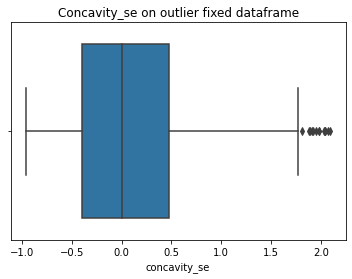

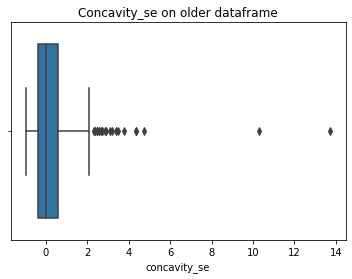

In [56]:
#Checking if the outliers have been fixed by plotting newer dataframe
sns.boxplot(scaled_df_fixed['concavity_se'])
plt.title("Concavity_se on outlier fixed dataframe")
plt.show()
sns.boxplot(scaled_df['concavity_se'])
plt.title("Concavity_se on older dataframe")
plt.show()

Since outliers are only making up for roughly 5% of the dataset, they have been imputed using the mean values of the column.

#### Q4. Which are the most important features that can predict if the cell is Benign (non-cancerous) and Malignant (cancerous) ?

We explore this business question with two methods:
1. Pearson's correlation
2. Using tree based classifier, built in importance score.

**1. Pearson correlation** -> We explore this correlation matrix in form of a heatmap.

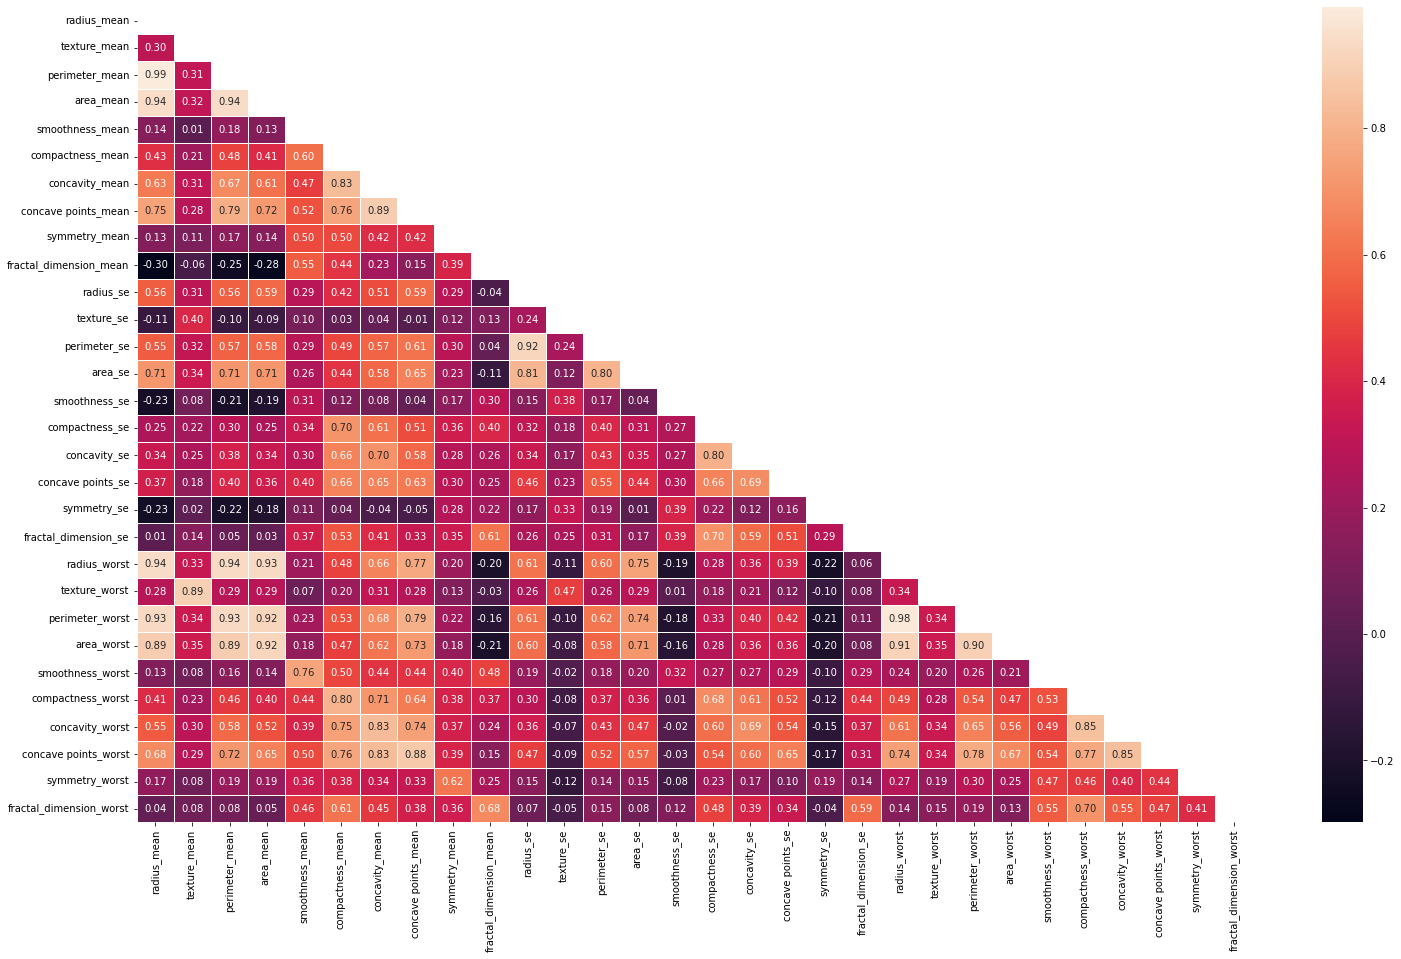

In [57]:
#Calculating the Pearson's correlation matrix
df_corr = scaled_df_fixed.corr(method='pearson')
#Plotting the matrix as heat map
fig, ax = plt.subplots(figsize=(25, 15))
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, fmt='.2f', linewidths=0.5, ax=ax, mask=matrix)
plt.show()


Apart from features which are derived from each other (like area_mean is calculated using radius_mean), there are some features which are highly correlated and there are features which have 0 correlation between them. We further explore the features with zero correlation and negative correlation to see if we can validate/find some interesting insights.

**Exploring attributes with zero correlation**

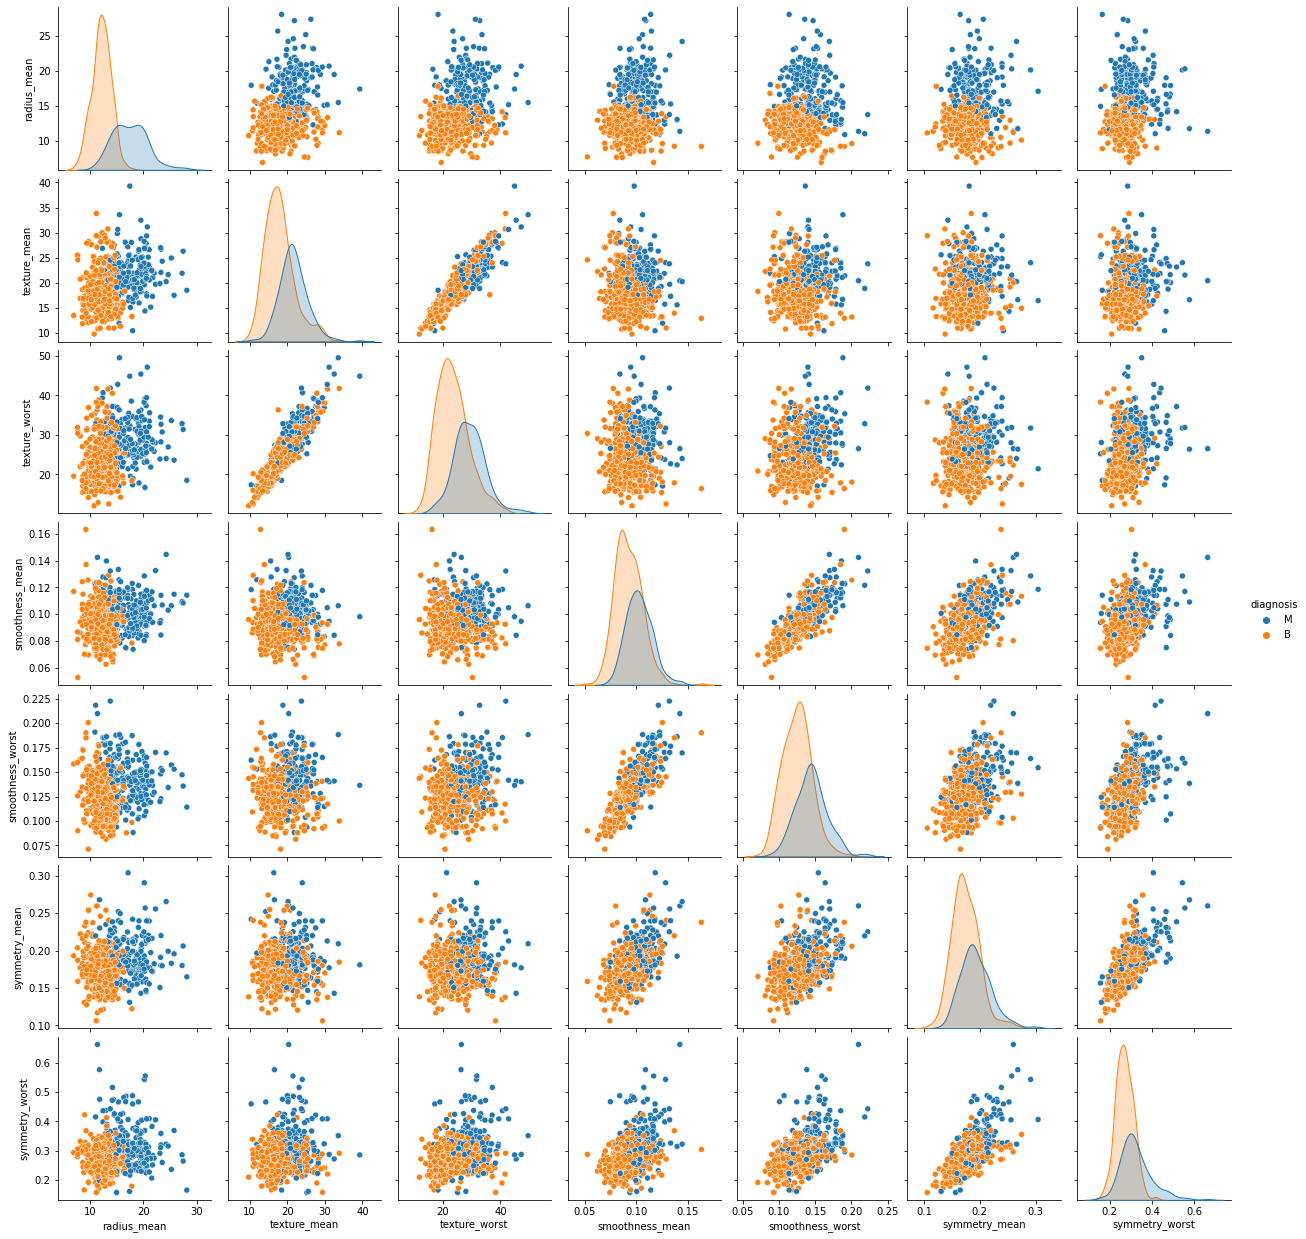

In [58]:
#Slice and plot the unrelated features of the dataset
df_unrelated = dataframe.loc[:, ['radius_mean', 'texture_mean', 'texture_worst',
                                 'smoothness_mean', 'smoothness_worst', 'symmetry_mean', 'symmetry_worst', 'diagnosis']]
sns.pairplot(df_unrelated, hue='diagnosis')
plt.show()


Above pairplots show, that the attributes with almost 0 pearson coefficient and are not correlated at all. (Neither linearly not in any other form) 


**Exploring attributes with large negative correlation**

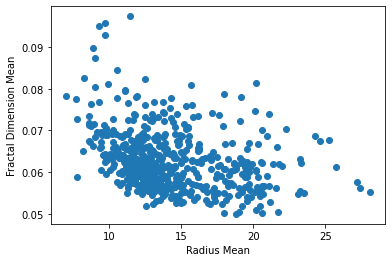

In [59]:
#Slice and plot the radius_mean and fractal_dimension_mean features
plt.scatter(x=dataframe['radius_mean'], y=dataframe['fractal_dimension_mean'])
plt.xlabel('Radius Mean')
plt.ylabel('Fractal Dimension Mean')
plt.show()

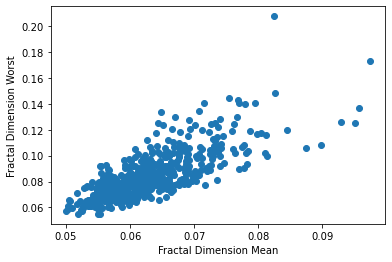

In [60]:
#Slice and plot the fractal_dimension_mean and fractal_dimension_worst features
plt.scatter(x=dataframe['fractal_dimension_mean'],
            y=dataframe['fractal_dimension_worst'])
plt.xlabel('Fractal Dimension Mean')
plt.ylabel('Fractal Dimension Worst')
plt.show()


The above scatter plots show that attributes that have a negative pearson's coefficient arent as highly correlated as attributes with positive pearson's coefficient.
Hence less number of attributes are negatively correlated.

**2.Feature Importance** -> we use tree based classifier, built in for feature importance. In this case, higher the score, higher importance of that attribute

[0.07123606 0.0239925  0.05520417 0.04118988 0.00966106 0.02004214
 0.07007717 0.06196399 0.00671944 0.00581756 0.01983948 0.00472803
 0.01850274 0.02265251 0.00700515 0.00684685 0.00779454 0.00828476
 0.00583876 0.00635331 0.1001573  0.02167911 0.08438497 0.08638831
 0.02237681 0.03620838 0.04487264 0.10421932 0.0150432  0.01091986]


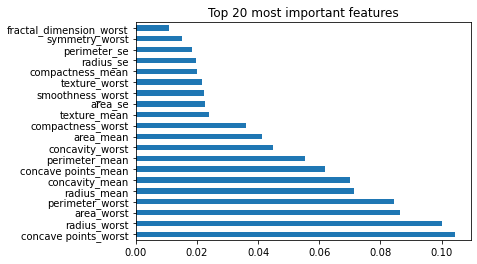

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df, diagnosis)
# use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 most important features")
plt.show()


Following are the most features:
1. area_mean                 
2. area_worst             
3. area_se
4. perimeter_worst           
5. perimeter_mean         
6. perimeter_se
7. texture_worst            
8. texture_mean            
9. concavity_mean
10. concavity_worst         
11. compactness_worst      
12. compactness_mean
13. concave points_ worst    
14. concave points_mean    
15. texture_mean
16. smoothness_mean          
17. radius_mean            
18. fractal_dimension_mean
19. symmetry_mean            
20. fractal_dimension_worst

We select the subset of above features to prep our data for modeling.

In [65]:
selected_features_df = scaled_df_fixed[['area_mean', 'area_worst', 'area_se', 'perimeter_worst', 'perimeter_mean', 'perimeter_se',
                                  'texture_worst', 'texture_mean', 'concavity_mean', 'concavity_worst', 'compactness_worst', 'compactness_mean',
                                  'concave points_worst', 'concave points_mean', 'texture_mean',
                                  'smoothness_mean', 'radius_mean', 'fractal_dimension_mean', 'symmetry_mean', 'fractal_dimension_worst']]
# selected_features_df


#### Q5. Can cancer causing tumor cells be predicted?

In this final business question, we investigate if we can accurately predict the nature of the tumor cell, using the data available. For this, we train the simple model of Logistic Regression. We are interested to see the precision and accuracy score of this data.

In [66]:
#Import libraries for train_test_split and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [67]:
#Split the dataset into training (75%) and testing (25%)
X_train, X_test, Y_train, Y_test = train_test_split(
    selected_features_df, diagnosis, test_size=0.25, random_state=0)


**Train the Logistic Regression model**

In [68]:
from sklearn.linear_model import LogisticRegression
current_test_classifier = LogisticRegression(random_state=0)
current_test_classifier.fit(X_train, Y_train)
predictions = current_test_classifier.predict(X_test)
# Score of the model
a_score = accuracy_score(np.array(Y_test['diagnosis']), predictions)
print('Accuracy Score = '+str(a_score*100) + '%')
p_score = precision_score(
    np.array(Y_test['diagnosis']), predictions, average='macro')
print('Precision Score = ' + str(p_score*100) + '%')


Accuracy Score = 96.5034965034965%
Precision Score = 96.09862671660424%


**Hurray!** we see an amazing score of precision of 96.09% and the accuracy score of 96.50%. Machine learning can indeed be used for diagnosis of breast cancer in patients. 